<a href="https://colab.research.google.com/github/brash99/phys441/blob/master/JupyterNotebooks/TravelingWaveConvection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diffusion in 1D

### Central Difference Approximation of Second Order Derivatives

\begin{eqnarray}
u_{i+1} & = & u_i + \Delta x \frac{\partial u}{\partial x} \bigg|_i + \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} \bigg|_i + \frac{\Delta x^3}{6} \frac{\partial^3 u}{\partial x^3} \bigg|_i + \frac{\Delta x^4}{24} \frac{\partial^4 u}{\partial x^4} \bigg|_ih.o.t \\ 
u_{i-1} & = & u_i - \Delta x \frac{\partial u}{\partial x} \bigg|_i + \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} \bigg|_i - \frac{\Delta x^3}{6} \frac{\partial^3 u}{\partial x^3} \bigg|_i + \frac{\Delta x^4}{24} \frac{\partial^4 u}{\partial x^4} \bigg|_i h.o.t \\
\end{eqnarray}

Adding these two equations together, we arrive at:

\begin{eqnarray}
\frac{\partial^2 u}{\partial x^2} & = & \frac{u_{i+1} - 2 u_i + u_{i-1}}{\Delta x^2} +
\frac{\Delta x^2}{12} \frac{\partial^4 u}{\partial x^4} + h.o.t \\ 
\end{eqnarray}

### The Diffusion Equation

\begin{equation}
\frac{\partial u}{\partial t} - \nu \frac{\partial^2 u}{\partial x^2} = 0
\end{equation}

where $\nu$ is the viscosity.  As before, we use the forward difference for the time derivative, and the central difference approximation for the second order spatial derivative.  Why is this so?  Well, time moves $forward$, and so using the forward difference makes sense for the time derivative.  The central difference approximation is $isotropic$ in the forward and backward directions, and since normal physical diffusion is directionally isotropic (in typical physical systems), this also makes sense.

\begin{equation}
\frac{u_i^{n+1} -  u_i^n}{\Delta t} - \nu \left( \frac{u^n_{i+1} - 2 u^n_i + u^n_{i-1}}{\Delta x^2} \right) = 0
\end{equation}

\begin{equation}
u_i^{n+1} =  u_i^n + \frac{\nu \Delta t}{\Delta x^2} \left( u^n_{i+1} - 2 u^n_i + u^n_{i-1} \right)
\end{equation}

In [1]:
# Remember: comments in python are denoted by the pound sign
import numpy as np                            #here we load numpy
from matplotlib import pyplot as plt     #here we load matplotlib
import time, sys                         #and load some utilities

In [2]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline                  

In [3]:
# We define the x-axis to start at x=0.0m and end at x=20.0m.
# 
# We specify the number of steps in x (nx), and the number
# of steps in t (nt), and calculate dx and dt based on these choices.

xrange = 20.0
trange = 24.0
nx = 401  # try changing this number from 41 to 81 and Run All ... what happens?
dx = xrange / (nx-1)
nt = 4000    #nt is the number of timesteps we want to calculate
dt = trange/ (nt-1)  #dt is the amount of time each timestep covers (delta t)

viscosity = 0.1
print ("Stability constant = %0.4f" % (viscosity*dt/dx**2))

# stability for viscosity*dt/dx**2 <= 1/2
dt_max = 0.5*dx**2/viscosity
nt_min = trange/dt_max+1
print ("Minimum number of timesteps = %0.0f" % nt_min)

x = np.linspace(0,xrange,nx)

pulseShapeChoice = 1

Stability constant = 0.2401
Minimum number of timesteps = 1921


In [4]:
# Set the wavefunction equal to all ones, initially
u = np.ones(nx)      #numpy function ones()

if (pulseShapeChoice == 1):
  # Test Case 1: Square Pulse
  u[int(9.75 / dx):int(10.25 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1
else:
  # Test Case 2:  Gaussian Pulse
  mu = 10.0
  sigma = 0.25
  for i in range(len(u)):
    u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)


Integral =  11.0


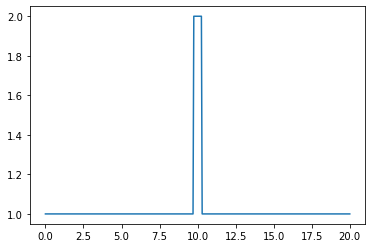

In [5]:
plt.plot(x, u)
print ("Integral = ",u.sum()-len(x))

In [6]:
#un = np.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx-1): ## you can try commenting this line and...
        u[i] = un[i] + viscosity * dt / dx**2 * (un[i+1] - 2.0*un[i] + un[i-1])

Integral =  10.999883441938323


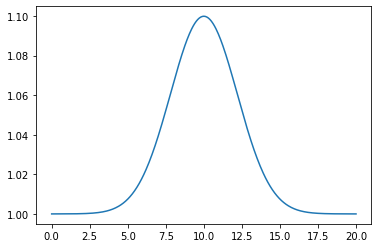

In [7]:
plt.plot(x, u)

print ("Integral = ",u.sum()-len(x))

Stability parameter = 0.4995 
nt_min = 1921
Integral =  11.0
Integral =  10.999884836263675
Integral =  10.999884567011975
Integral =  10.999884602457257
Integral =  10.9998845963147
Integral =  10.999884595838182
Integral =  10.999884594592743


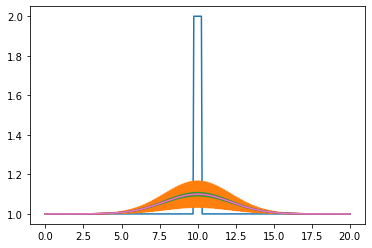

In [8]:
xrange = 20.0
trange = 24.0
nx = 401  # try changing this number from 41 to 81 and Run All ... what happens?
dx = xrange / (nx-1)
nt = 1923    #nt is the number of timesteps we want to calculate
dt = trange/ (nt-1)  #dt is the amount of time each timestep covers (delta t)

print ("Stability parameter = %0.4f " % (viscosity*dt/dx**2))
print ("nt_min = %0.0f" % (2*viscosity*trange*(nx-1)**2/xrange**2+1))

u = np.ones(nx)      #numpy function ones()
x = np.linspace(0, xrange, nx)

if (pulseShapeChoice == 1):
  # Test Case 1: Square Pulse
  u[int(9.75 / dx):int(10.25 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1
else:
  # Test Case 2:  Gaussian Pulse
  mu = 10.00
  sigma = 0.25
  for i in range(len(u)):
    u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)

plt.plot(x, u)
print ("Integral = ",u.sum()-len(x))

for ntt in range(nt-3,nt+3):
  dt = trange/(ntt-1)
  u = np.ones(nx)      #numpy function ones()
  if (pulseShapeChoice == 1):
    u[int(9.75 / dx):int(10.25 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1
  else:
    for i in range(len(u)):
      u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)
  for n in range(ntt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx-1): ## you can try commenting this line and...
        u[i] = un[i] + viscosity * dt / dx**2 * (un[i+1] - 2.0*un[i] + un[i-1])
  plt.plot(x, u)
  print ("Integral = ",u.sum()-len(x))

Integral =  10.999884836263675
Integral =  10.999884567011975
Integral =  10.999884602457257
Integral =  10.9998845963147
Integral =  10.999884595838182
Integral =  10.999884594592743


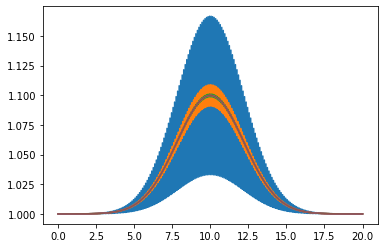

In [9]:
for ntt in range(nt-3,nt+3):
  dt = trange/(ntt-1)
  u = np.ones(nx)      #numpy function ones()
  if (pulseShapeChoice == 1):
    u[int(9.75 / dx):int(10.25 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1
  else:
    for i in range(len(u)):
      u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)
  for n in range(ntt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx-1): ## you can try commenting this line and...
        u[i] = un[i] + viscosity * dt / dx**2 * (un[i+1] - 2.0*un[i] + un[i-1])
  plt.plot(x, u)
  print ("Integral = ",u.sum()-len(x))